In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

2023-12-12 12:11:02.819433: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-12 12:11:02.990675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-12 12:11:02.990708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-12 12:11:03.017343: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-12 12:11:03.076680: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.15.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-12 12:11:30.191557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-12 12:11:30.284507: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-12 12:11:30.284539: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


#### Get Fashion Mnist

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# save class names, since they're no provided with the dataset

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Data Exploration

In [8]:
print("Train Data Shape:", x_train.shape)
print("Train labels length:", len(y_train))
print("Label examples", y_train[:10])
print("Test data shape", y_test.shape)
print("Test labels length:", len(y_test))

Train Data Shape: (60000, 28, 28)
Train labels length: 60000
Label examples [9 0 0 3 0 2 7 2 5 5]
Test data shape (10000,)
Test labels length: 10000


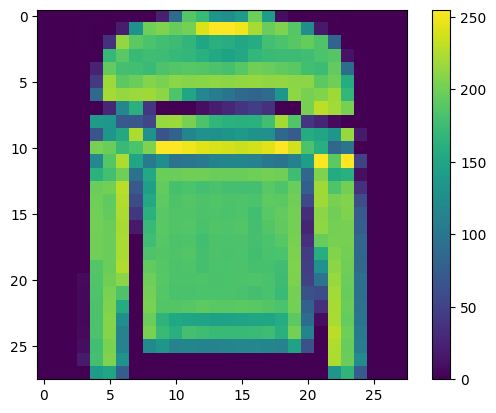

In [9]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

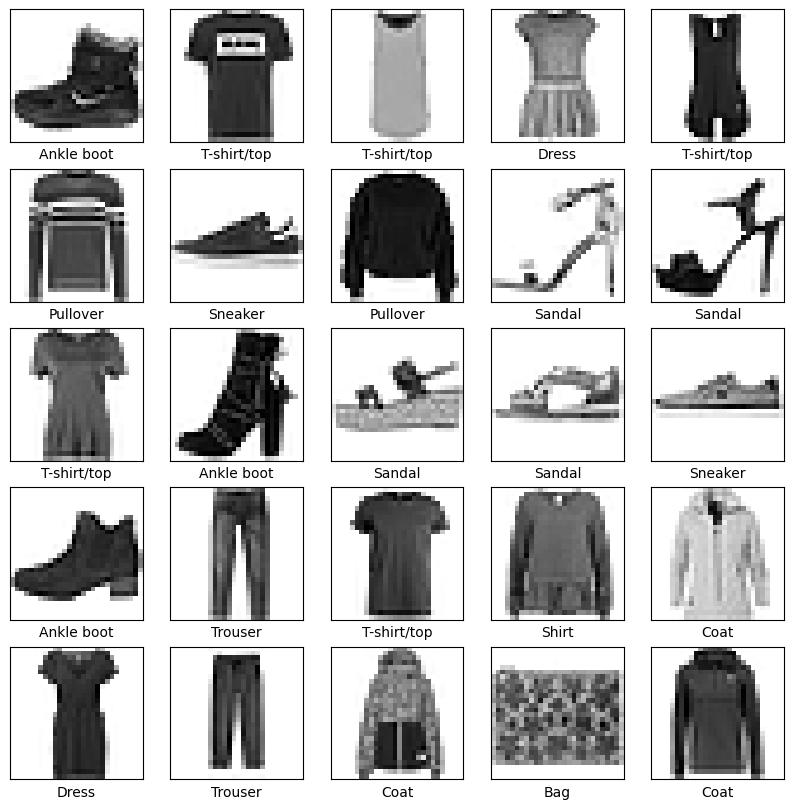

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

#### Build Model

In [13]:
from keras import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10)
])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-12-12 12:49:32.151884: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-12 12:49:32.241227: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f97577e04d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-12 12:49:32.241260: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti Laptop GPU, Compute Capability 8.6
2023-12-12 12:49:32.250773: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-12 12:49:32.274230: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1702414172.348898    9710 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4962 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2927 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2476 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2354 - accurac

#### Evaluation and Prediction

In [15]:
# Looks like there's some overfitting
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3540 - accuracy: 0.8810 - 808ms/epoch - 3ms/step

Test Accuracy: 0.8809999823570251


In [17]:
probability_model = Sequential([model, 
                                tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

313/313 [==============================] - 0s 900us/step
[1.1304259e-09 3.0286201e-11 9.8916617e-09 1.7678364e-10 3.2596352e-09
 2.3290613e-03 3.1219095e-08 1.8856764e-02 8.2502556e-09 9.7881407e-01]
9
9


In [29]:
def plot_image(i, prediction_array, true_label, image):
    true_label, img = true_label[i], image[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(prediction_array),
                                         class_names[true_label]),
                                        color=color)

def plot_value_array(i, prediction_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

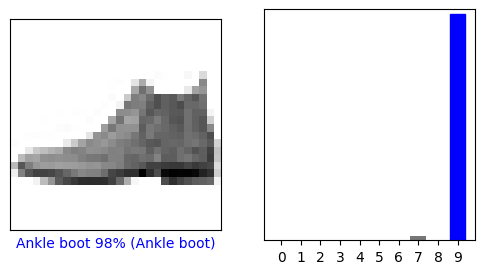

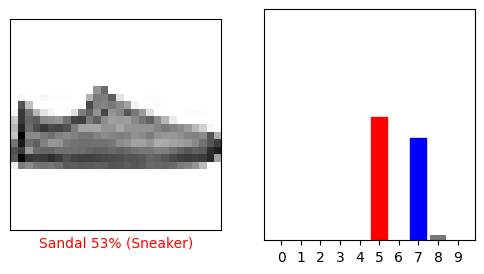

In [33]:
def plot_results(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], y_test)
    plt.show()

plot_results(0)
plot_results(12)

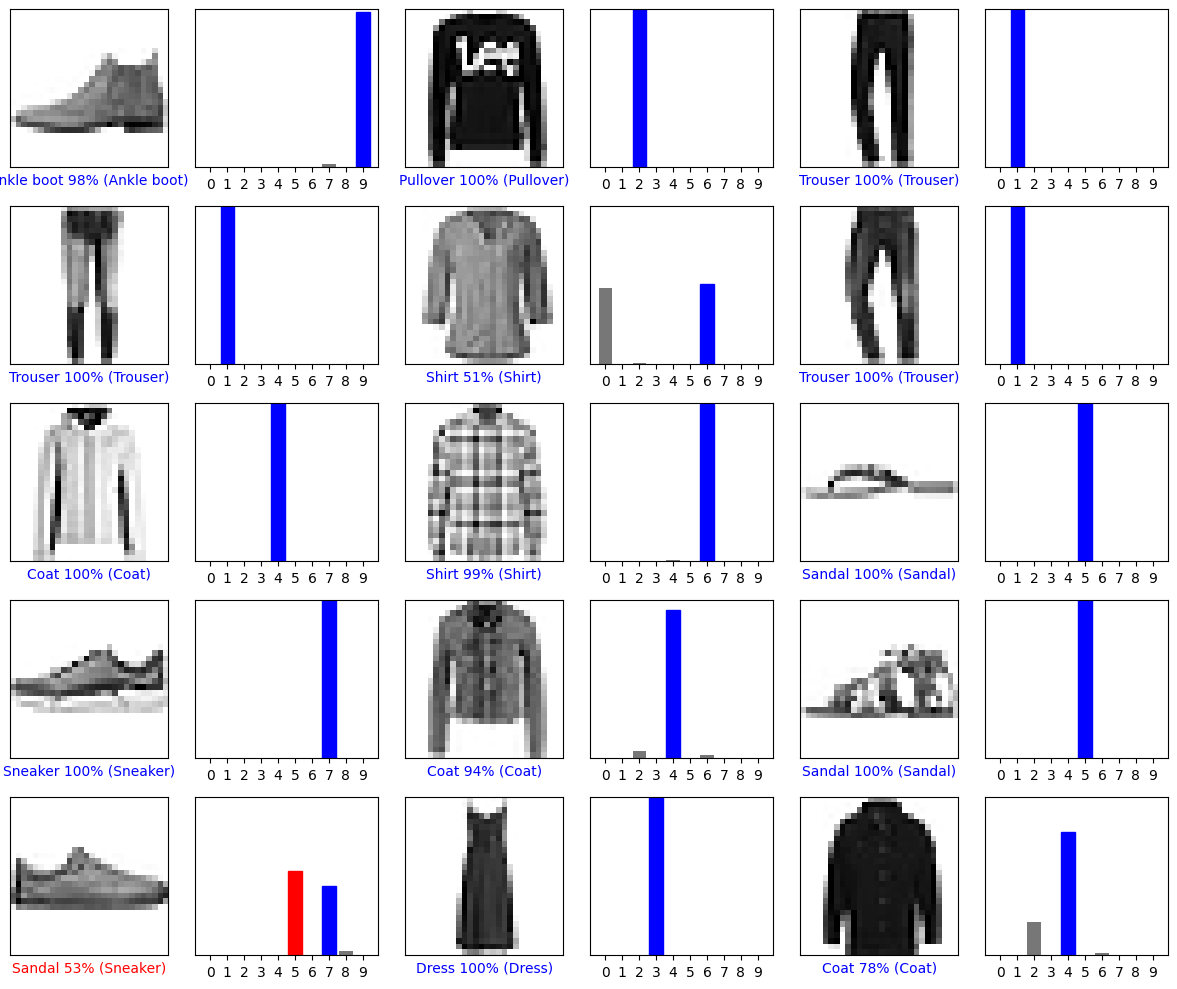

In [34]:
num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

#### Do this with model subclassing

In [65]:
y_train.shape

(60000,)

In [42]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [59]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Model

class FashionModel(Model):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten(input_shape=(32,28,28))
        self.d1 = Dense(128, activation='relu')
        self.out = Dense(10)
    
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.out(x)

model = FashionModel()

In [51]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [66]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=False)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [67]:
@tf.function
def test_step(images, labels, loss_object, optimizer):
    predictions = model(images, training='False')
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [68]:
EPOCHS = 10

for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)
    
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels, loss_object, optimizer)
    
    print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
    )

Epoch 1, Loss: 0.5000523328781128, Accuracy: 82.53666687011719, Test Loss: 0.4456401467323303, Test Accuracy: 84.12000274658203
Epoch 2, Loss: 0.3750148117542267, Accuracy: 86.38500213623047, Test Loss: 0.3767801821231842, Test Accuracy: 86.54000091552734
Epoch 3, Loss: 0.3364875614643097, Accuracy: 87.5999984741211, Test Loss: 0.3633958101272583, Test Accuracy: 86.94999694824219
Epoch 4, Loss: 0.31384867429733276, Accuracy: 88.56666564941406, Test Loss: 0.36700356006622314, Test Accuracy: 86.95999908447266
Epoch 5, Loss: 0.2950088679790497, Accuracy: 89.09333038330078, Test Loss: 0.35746410489082336, Test Accuracy: 87.0199966430664
Epoch 6, Loss: 0.2786504924297333, Accuracy: 89.6866683959961, Test Loss: 0.36499112844467163, Test Accuracy: 86.8499984741211
Epoch 7, Loss: 0.268805593252182, Accuracy: 89.95000457763672, Test Loss: 0.35318610072135925, Test Accuracy: 87.97000122070312
Epoch 8, Loss: 0.25814688205718994, Accuracy: 90.41500091552734, Test Loss: 0.3356332778930664, Test Acc

There was an issue here where I was getting a Value error saying "Creating variables on a non-first call to a function decorated with tf.function" refering to the line in the training loop for test_step.

I didn't really change anything, I just added the loss_object, optimizer variables to the function call, but I don't really know why that works. For context I was mostly copying the quickstart guide on this one but attenpting to replicate the model created above. I'll have to see where this goes